In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [4]:
bathym = dv.mbathy

In [6]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [7]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          ,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [37]:
p = p_list[1]
x,y,z = latlon_to_xyz(p[1],p[0])
print(x,y,z)

830.2672625246594 501.54775861623307 6296.725110611615


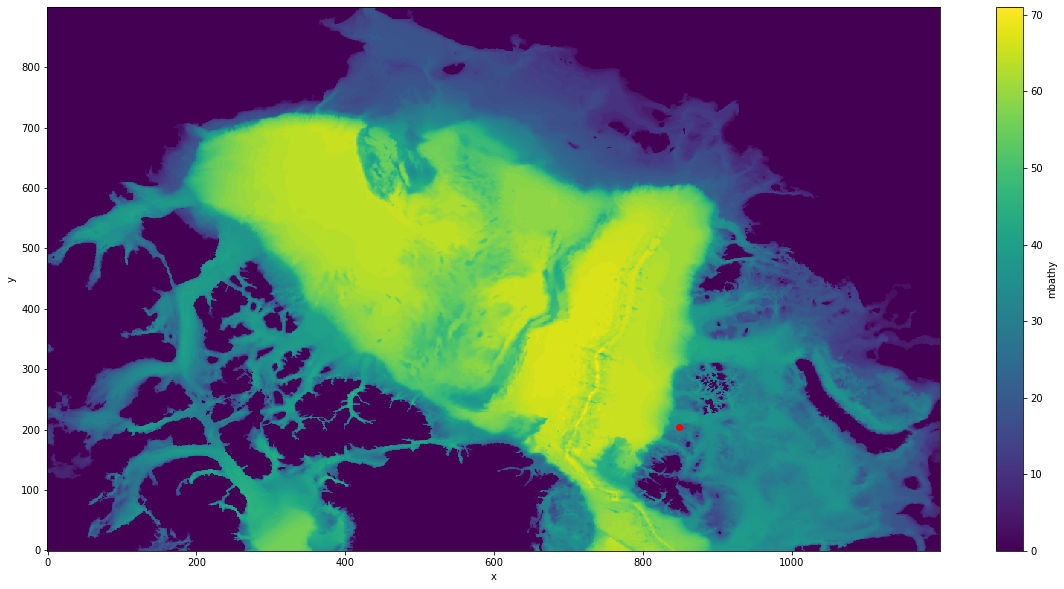

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
bathym.plot()
ax.plot(848, 204, marker='o', color='r')

Deler inn i tre kart for hvert sted

In [88]:
# Barents sea

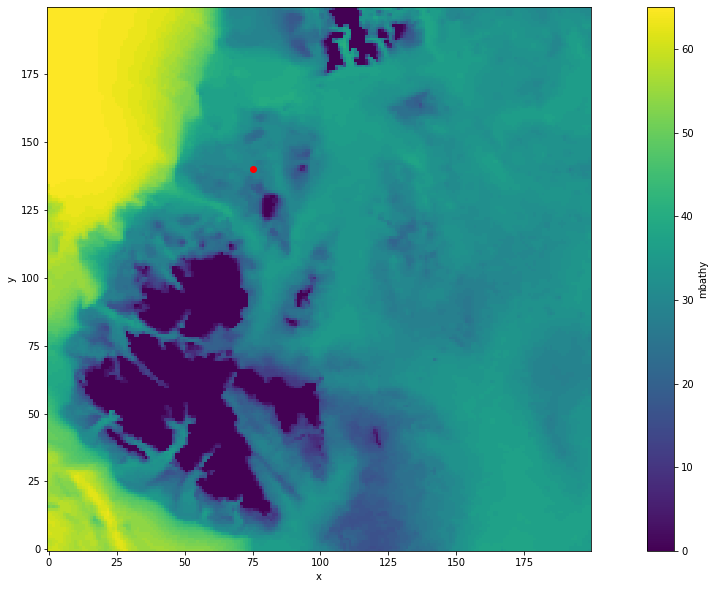

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
bathym.isel(x=slice(780,980), y=slice(50,250)).plot()
ax.plot(75,140,marker='o', color='r')
ax.set_aspect('equal')

# Location for each mooring: 

- d13: latitude: 81◦24.202’N
       longitude: 31◦13.247’E
- d15: latitude: 81◦24.255’N
       longitude: 31◦13.533’E
- d17: latitude: 81◦24.587’N
       lonitude: 31◦14.506’E
- MB: latitude: 69 N 52.89
      longitude: 011E 11.89
- MW: latitude: 68 N 58.759
      longitude: 013E 16.845 
- MN: latitude: 68 N 56.109
      lonitude: 013E 19.866
- MS: latitude: 68 N 50.128
      longitude: 012E 45.082   
- y1: longitude: 79.37209
      lontitude: 5.57541
- y2: latitude: 80.03876
      longitude: 5.48733
- y3: latitude: 79.44093
      longitude: 5.56333


In [ ]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          ,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [147]:
p = p_list[0]
p_lat = p[1]
p_lon = p[0]
p_lat

81.24202

In [239]:
bathym

<xarray.DataArray 'mbathy' (t: 1, y: 900, x: 1200)>
dask.array<xarray-mbathy, shape=(1, 900, 1200), dtype=int16, chunksize=(1, 900, 1200), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
Dimensions without coordinates: t, y, x

In [ ]:
dzz

In [129]:
lat = bathym.nav_lat
lon = bathym.nav_lon

In [200]:
latnull = lat.values.flatten()
lonnull = lon.values.flatten()

In [230]:
lon.values

array([[ -89.1416  ,  -89.08634 ,  -89.03102 , ...,   42.00175 ,
          42.064854,   42.127846],
       [ -89.185974,  -89.13083 ,  -89.07562 , ...,   42.071568,
          42.134567,   42.197456],
       [ -89.23045 ,  -89.17542 ,  -89.12033 , ...,   42.14156 ,
          42.204456,   42.267242],
       ...,
       [-131.83008 , -131.90262 , -131.9752  , ...,  114.89426 ,
         114.81782 ,  114.74144 ],
       [-131.854   , -131.92659 , -131.99924 , ...,  114.93157 ,
         114.855095,  114.77868 ],
       [-131.87785 , -131.9505  , -132.02318 , ...,  114.968765,
         114.89225 ,  114.815796]], dtype=float32)

In [ ]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          #,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [233]:
fig, ax = plt.subplots(figsize=(20,10))
bathym.plot()

for p in p_list:
    lat_v = p[1]
    lat_value = [min(latnull, key=lambda x:abs(x-h)) for h in [lat_v]]
    idx = np.where(lat.values==lat_value)
    ax.plot(848, 204, marker='o', color='r')

SyntaxError: unexpected EOF while parsing (<ipython-input-233-a63399ca012f>, line 1)

In [ ]:
lat_value = [min(latnull, key=lambda x:abs(x-h)) for h in [morlat1, morlat2, morlat3]]

In [236]:
lat_value = [min(latnull, key=lambda x:abs(x-h)) for h in [p[1]]]
lon_value = [min(lonnull, key=lambda x:abs(x-h)) for h in [p[0]]]

In [237]:
print(lat_value)
print(p[1])
print('lon value closest to point ', p[0],lon_value)
print(p[0])

[81.24196]
81.24202
[31.132612]
31.13247


In [241]:
idx_lat = np.where(lat.values==lat_value)
idx_lon = np.where(lon.values==lon_value)

In [242]:
print(idx_lat)
print(idx_lon)

(array([123, 567]), array([584, 584]))
(array([4]), array([1045]))


In [243]:
print('lat values: ', lat[idx_lat].values)
print('---------------------------')
print('lon values: ', lon[idx_lon].values)

lat values:  [[81.24196 81.24196]
 [81.24196 81.24196]]
---------------------------
lon values:  [[31.132612]]


In [253]:
print('lat values with lon idx: ', lat[idx_lon].values)
print('---------------------------')
print('lon values with lat idx: ', lon[idx_lat].values)

lat values with lon idx:  [[69.991394]]
---------------------------
lon values with lat idx:  [[ -37.125473  -37.125473]
 [-176.87453  -176.87453 ]]


## Tester om methoden funker for et punkt (500,550): 
- OK

In [256]:
# Tester også for p 500,550
print('lat values: ', lat[500,550].values)
print('---------------------------')
print('lon values: ', lon[500,550].values)
print('---------------------------')
print('lat values with lon idx: ', lat[500,550].values)
print('---------------------------')
print('lon values with lat idx: ', lon[500,550].values)

lat values:  83.18452
---------------------------
lon values:  -160.44263
---------------------------
lat values with lon idx:  83.18452
---------------------------
lon values with lat idx:  -160.44263


In [258]:
idx_lat = np.where(lat.values==83.18452)
idx_lon = np.where(lon.values==-160.44263)
print('lat values: ', lat[idx_lat].values)
print('---------------------------')
print('lon values: ', lon[idx_lon].values)
print('OK, Ser at dette funker riktig for dette punktet')

lat values:  [[83.18452 83.18452]
 [83.18452 83.18452]]
---------------------------
lon values:  [[-160.44263]]
OK, Ser at dette funker riktig for dette punktet


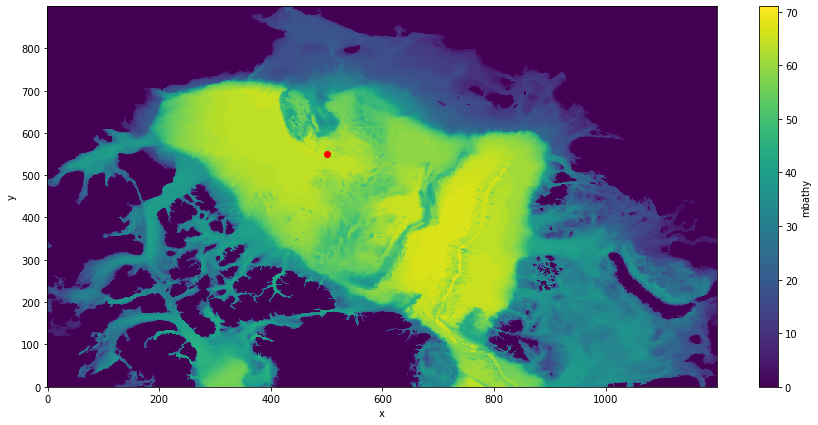

In [259]:
fig, ax = plt.subplots(figsize=(15,7))
bathym.plot()
ax.plot(500,550, marker='o', color='r')